### **Nama: Muhammad Amanda**
### **Username: muh_amanda** 
### **Kota: Kota Jakarta Timur, DKI Jakarta**
### *Waktu bergabung pada 12 May 2020*

# Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [5]:
%cd /content

/content


In [7]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 32.7MB/s]


In [8]:
!ls

daily-climate-time-series-data.zip  drive  kaggle.json	sample_data


In [9]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


# **Import library**

In [10]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

# **Load dataset**

* Data: [Daily Climate time series data](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTrain.csv)
* 1600 observation
* 

In [48]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
data_train = df[["date","wind_speed"]]
data_train.info()
data_train.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1462 non-null   object 
 1   wind_speed  1462 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [49]:
data_train.isnull().sum() #cek data hilang

## mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array
dates = data_train['date'].values
temp  = data_train['wind_speed'].values

# **Split Dataset**

membagi dataset menjadi data training (80%) dan data test (20%).

In [50]:
from sklearn.model_selection import train_test_split
train_dates, test_dates, train_temp, test_temp = train_test_split(dates, temp, test_size=0.2)

# **Plot Data**

melakuklan plot data training.

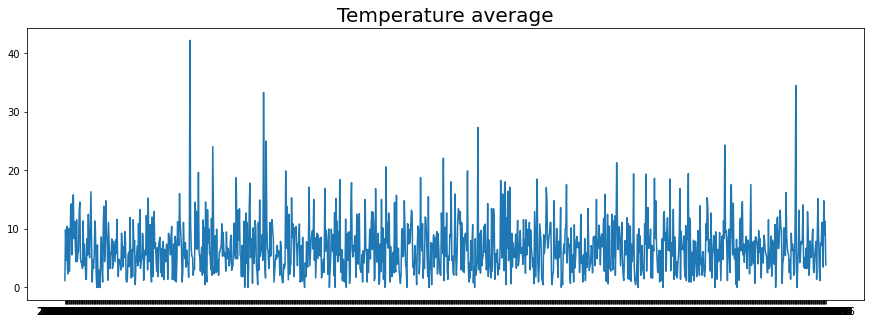

In [51]:
plt.figure(figsize=(15,5))
plt.plot(train_dates, train_temp)
plt.title('Temperature average',
          fontsize=20);

# **Arsitektur model**
* menggunakan LSTM.
* menggunakan model sequential.
* menggunakan Learning Rate pada Optimizer.

In [52]:
# Fungsi di bawah menerima sebuah series/atribut kita yang telah di konversi menjadi tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam bentuk batch.

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)


train_set = windowed_dataset(train_temp, window_size=100, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1),
])

# arsitektur model gunakan 2 buah layer LSTM
# layer pertama LSTM harus memiliki parameter return_sequences yang bernilai True

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# **Skala data**
* 10% skala data training
* 10% skala data testing

In [53]:
(data_train['wind_speed'].max()-data_train['wind_speed'].min())*0.1


4.222

In [54]:
(train_temp.max()-train_temp.min())*0.1

4.222

In [55]:
(test_temp.max()-test_temp.min())*0.1

3.0685714285714285

# **Metric evaluasi dan fitting model**

In [56]:

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"]) # Loss function Huber umum digunakan pada kasus time series.
#history = model.fit(temp,epochs=30, batch_size=100, verbose=2)

history = model.fit(train_set, epochs=100, batch_size=100, verbose=2)



Epoch 1/100
11/11 - 6s - loss: 6.2587 - mae: 6.7489
Epoch 2/100
11/11 - 2s - loss: 6.1956 - mae: 6.6855
Epoch 3/100
11/11 - 2s - loss: 6.1128 - mae: 6.6020
Epoch 4/100
11/11 - 2s - loss: 6.0259 - mae: 6.5137
Epoch 5/100
11/11 - 2s - loss: 5.9416 - mae: 6.4277
Epoch 6/100
11/11 - 2s - loss: 5.8588 - mae: 6.3431
Epoch 7/100
11/11 - 2s - loss: 5.7776 - mae: 6.2606
Epoch 8/100
11/11 - 2s - loss: 5.6952 - mae: 6.1769
Epoch 9/100
11/11 - 2s - loss: 5.6112 - mae: 6.0911
Epoch 10/100
11/11 - 2s - loss: 5.5236 - mae: 6.0013
Epoch 11/100
11/11 - 2s - loss: 5.4315 - mae: 5.9086
Epoch 12/100
11/11 - 2s - loss: 5.3340 - mae: 5.8104
Epoch 13/100
11/11 - 2s - loss: 5.2299 - mae: 5.7057
Epoch 14/100
11/11 - 2s - loss: 5.1187 - mae: 5.5943
Epoch 15/100
11/11 - 2s - loss: 5.0022 - mae: 5.4780
Epoch 16/100
11/11 - 2s - loss: 4.8811 - mae: 5.3564
Epoch 17/100
11/11 - 2s - loss: 4.7549 - mae: 5.2293
Epoch 18/100
11/11 - 2s - loss: 4.6247 - mae: 5.0986
Epoch 19/100
11/11 - 2s - loss: 4.4932 - mae: 4.9661
Ep

# **Plot mae dan loss**

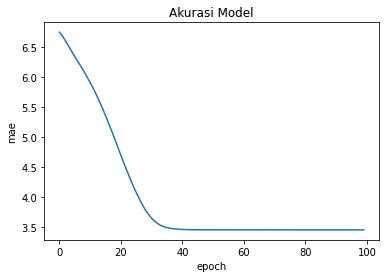

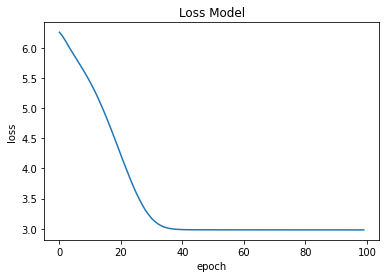

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.title('Akurasi Model')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# **Hasil evaluasi model pada data test**

In [58]:
test_set = windowed_dataset(test_temp, window_size=100, batch_size=100, shuffle_buffer=1000)
history_test = model.evaluate(test_set)

2/2 [==============================] - 1s 84ms/step - loss: 2.9864 - mae: 3.4615
